# Load the Percentile Dataset into the Raster file


Development code for processing and loading the percentiles file


In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

from demosearch import ConfigFile

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
la_jolla = -117.35087 ,32.7526, -117.1458, 32.8862
inner_sd =  -117.31,32.57,-116.8, 33.21

la_jolla_c = np.mean([la_jolla[1], la_jolla[3]]), np.mean([la_jolla[0], la_jolla[2]])
la_jolla_c

(32.8194, -117.248335)

In [3]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# Percentile breaks for radius search layers
`civicknowledge.com-percentile-demosearch-1.1.1` Last Update: 2021-05-24T18:40:05

_Percentile breaks for each radius search layer, per CBSA_




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [all_scores](data/all_scores.csv)**. All scores from which the percentiles are computed
* ** [percentiles](data/percentiles.csv)**. Percentiles data

In [4]:
config = ConfigFile.default()
cache = config.cache

In [5]:
pp = mp.open_package('index:civicknowledge.com-percentile-demosearch#percentiles')
pp

# Percentile breaks for radius search layers
`civicknowledge.com-percentile-demosearch-1.1.1` Last Update: 2021-05-24T18:40:05

_Percentile breaks for each radius search layer, per CBSA_




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [all_scores](data/all_scores.csv)**. All scores from which the percentiles are computed
* ** [percentiles](data/percentiles.csv)**. Percentiles data

In [6]:
pct = pp.resource().dataframe()


In [7]:
with config.manager as rm:
    print(rm.h5_file.keys())

<KeysViewHDF5 ['_support', '_suppose', 'osmpoints', 'roads', 'tracts']>


In [16]:
# Independently check that we can get all of the variables out of the raster
s = set()
lyr = set()

def _f(k,g):
    """Produce a set withe the column names for the data in the raster."""
    
    # like: osmpoints/10/layers/entertain
    if '/layers/' in k:
        p = k.split('/')
        s.add( ('layer',p[0],p[3]))
        lyr.add(f"{p[0]}/{p[3]}")
        
    # like: tracts/12/data/census
    elif '/data/' in k:
        p = k.split('/')
        try:
            layers = g.attrs['layers']
            for l in layers:
                s.add( ('data',p[0],p[3], l))
                lyr.add(f"{p[0]}/{p[3]}/{l}")
        except KeyError:
            #print(k)
            pass
        
with config.manager as rm:
    rm.h5_file.visititems(_f)
    lyr_d = rm.layers


# Check that all of the layers we found by sets in are in the
# layers dict
for l in lyr:
    lyr_d[l]
    
# And vice-versa
for k in lyr_d:
    assert(k in lyr)
    
## Ok, so now we know that the set s has the information we need to check the variables
# we will try to attach the percentiles to. 
 

In [15]:
from geoid.census import Cbsa
rm = config.manager
geoid = rm.find_cbsa(la_jolla_c).geoid



In [18]:

scores = pkg.resource('all_scores').geoframe()

In [19]:
scores.head()

,total_population,male,female,over25_college,over25_high_school,seniors,households,households_unmaried,housing_owned_college,housing_rented_college,...,bar,cafe,active,travel,food,cbsa,naics,group,geometry,group_cbsa
0,15692.004947,8345.588060,7346.416887,2008.046067,7829.781693,2897.592292,5661.056290,386.154188,1024.773368,175.348180,...,3.271914,0.000000,1.170573,57.966400,1.422571,31000US34060,441120,auto,POINT (-79.97178 39.65603),31000US34060
1,20498.169260,10157.550981,10340.618279,3528.244892,6900.730943,1856.560945,6782.958559,400.579569,1684.088096,517.123114,...,0.000000,0.000000,2.636499,17.900014,1.403604,31000US21340,445210,food,POINT (-106.47724 31.77561),31000US21340
2,918626.987058,432778.913318,485848.073741,167465.128843,324924.235980,113063.453178,342645.961628,24809.111797,53281.619855,50515.087453,...,57.455629,51.189541,194.793388,2074.468229,156.488281,31000US37980,442110,shop,POINT (-75.15342 39.91441),31000US37980
3,288348.085439,141679.580102,146668.505337,50426.995053,117503.365435,47747.345063,102377.166581,7631.293479,22034.781129,7037.615514,...,7.738789,6.244411,27.763176,663.636364,5.038613,31000US38060,722511,ent,POINT (-111.76944 33.42932),31000US38060
4,69041.224410,34494.422690,34546.801720,11472.182702,23647.906270,8607.869637,23501.632873,1522.381126,5144.651377,1765.664115,...,0.000000,1.170573,1.208508,63.045658,0.487739,31000US26420,453220,shop,POINT (-95.44389 30.28791),31000US26420


In [20]:
t = scores[scores.group_cbsa == geoid]

<AxesSubplot:>

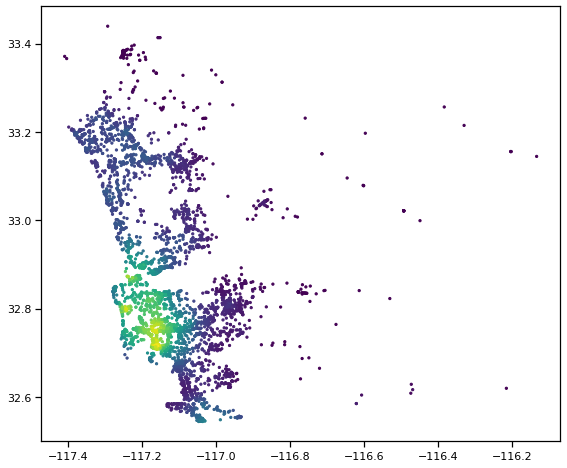

In [30]:

t.plot(column='cafe', figsize= (12, 8), marker='o', markersize=5)